In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
x_train = train.iloc[:, 1:]
y_train = train['label']
x_test = test.copy()

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] // 28, x_train.shape[1] // 28, 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] // 28, x_test.shape[1] // 28, 1))
# # converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)

print(x_train.shape, x_test.shape, y_train.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1) (42000, 10)


In [27]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [28]:
model = basic_cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                490050    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
________________________________________________

In [29]:
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

NameError: name 'plt' is not defined

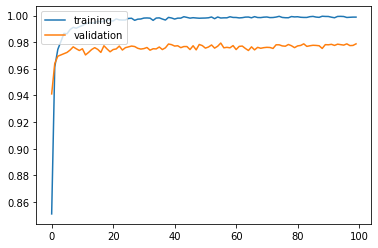

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [44]:
mySubmission = model.predict_classes(x_test, verbose=1)
mySubmission

875/875 [==============================] - 2s 3ms/step


array([2, 0, 9, ..., 3, 9, 2])

In [47]:
mySubmission = pd.DataFrame(data = {'ImageId': list(np.arange(1, len(mySubmission) + 1)), 'Label': list(mySubmission)})
mySubmission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [49]:
mySubmission.to_csv("mySubmission_BasicCNN.csv", index=False)

## deepCNN

In [59]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model2 = deep_cnn()
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 50)       

In [57]:
history = model2.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

NameError: name 'model2' is not defined

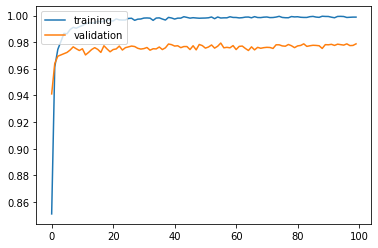

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
mySubmission = model2.predict_classes(x_test, verbose=1)
mySubmission

In [ ]:
mySubmission = pd.DataFrame(data = {'ImageId': list(np.arange(1, len(mySubmission) + 1)), 'Label': list(mySubmission)})
mySubmission

In [ ]:
mySubmission.to_csv("mySubmission_DeepCNN.csv", index=False)